In [1]:
# question 1
def longest_common_subsequences(x, y):
    """
    Computes the longest common subsequences (LCS) between two strings.

    This function finds all the possible longest common subsequences between two input strings
    using dynamic programming, and returns the sequences along with their length.

    Parameters
    ----------
    x : str
        The first string to compute the LCS.
    y : str
        The second string to compute the LCS.

    Returns
    ----------
    all_lcs : tuple
        A tuple containing:
        - A list of all the possible LCSs, sorted lexicographically.
        - The length of the longest common subsequences.

    Notes
    -----
    If no common subsequence exists, the function returns (None, 0).
    """
    # Step 1: Initialize the DP table
    m, n = len(x), len(y)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Step 2: Fill the DP table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i - 1] == y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    # Step 3: Backtrack to find all LCSs
    def backtrack(i, j):
        """
        Recursively backtracks through the DP table to find all the longest common subsequences.

        Parameters
        ----------
        i : int
            The current index in string x.
        j : int
            The current index in string y.

        Returns
        -------
        set
            A set of all possible subsequences found from the current indices.
        """
        # Base case
        if i == 0 or j == 0:
            return {""}

        if x[i - 1] == y[j - 1]:
            # If characters match, include it in the LCS
            return {s + x[i - 1] for s in backtrack(i - 1, j - 1)}
        else:
            # Otherwise, explore both options and merge the results
            lcs_set = set()
            if dp[i - 1][j] >= dp[i][j - 1]:
                lcs_set.update(backtrack(i - 1, j))
            if dp[i][j - 1] >= dp[i - 1][j]:
                lcs_set.update(backtrack(i, j - 1))
            return lcs_set

    # Step 4: Collect all LCSs and return the result
    all_lcs_set = backtrack(m, n)
    all_lcs = sorted(list(all_lcs_set))  # Sort lexicographically for consistency
    lcs_length = dp[m][n]

    # Step 5: Return the results
    if lcs_length == 0:
        return (None, 0)
    return (all_lcs, lcs_length)

# Test cases
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'

# Verify outputs
result1 = longest_common_subsequences(x1, y1)
result2 = longest_common_subsequences(x2, y2)
result3 = longest_common_subsequences(x3, y3)
result4 = longest_common_subsequences(x4, y4)

# Ensure order and content match
assert result1 == (['BCAB', 'BCBA', 'BDAB'], 4), f"Test Case 1 Failed: {result1}"
assert result2 == (None, 0), f"Test Case 2 Failed: {result2}"
assert result3 == (['a'], 1), f"Test Case 3 Failed: {result3}"
assert result4 == (['ac'], 2), f"Test Case 4 Failed: {result4}"

print("All test cases passed successfully!")


All test cases passed successfully!


In [2]:
#question 2
import numpy as np

# Given set of strings
set_strings = [
    ('a', 'ATGGTGCGAAAGCATCTCTTTTCGTGGCGTGATAAGTTTTATGGTATCCCCGGACGTTGGCTACTACAATTCTCCGAAGTATAAGTGAGTAGGATATGTCAATAACAAGAGGGGATGCGTGACGCATTAGCACCAACTGAATCAAACGATAACTAACGTGGTTTCAGTGAGCGTATGTGGCAAAGGATTGGATACATTTTTCGAGCACGTCTACATAATGACCGTGACAATACTGGAGACTCCGTACCGTCATCTTGACACTCCT'),
    ('b', 'TGGTGCGAAAGCATCTCTTTTCCGTGGCGTATAGTTTTATGGTATCCCCGGAACGCTGGCTACTACAATCTCCGAAGTATAGAGTGAGTAGATTTAATTAACAGAGGGCGTCGTTGACGCATTAGCACCAACTGAATCAACCGATAACTTAACGTGGGTTTCAGTGACTATAGGGCAAAGGATGAACATTTTCGAGCAGCTCTAATAATGAGCGTGACAATATGAATCCACACCGTCATCTTGAACTCCT'),
    ('c', 'TCTGTGCGATATACATCTCTATCGTTGCGGTATGTTTTATGTGCATCACCCCACGCGCTGGCTACAGTACAATCTGCTGGAAGTACTAGGTGGTAGTTAATAACTAGGGTGCGTCGTTGCGCATTACACAACTGGACAACCACTTAACTGGGGTAATCAGTGTTTAGGGCAGACAAGATGAAAACAAGTTTTCGAGCAGGCTCCTATAATGAGGACGGAACGTTAATAAATCCAACACCGCACTGCTTCGTAACCCT'),
    ('d', 'ATGAGGCGCAAAATTCTCTTTCTCGTGGCGCTGATTAAGTTTTATGTATCCCCGGACGTTGGCTACTGACAATTGCTCCGAAGTATAAAGTAGTAGGATATGTCAATAACAAAGACGGGGATAGCGTGACAGCATTAGAACGCAACTGGAATCAAACGTAACCTAAAGGGTTGTCAGGAGCGTATGTGGTCAAAAAGGATTGGATGACATTTTTCGACACGTCTACATAATGACCTGTGACAAACTAGGAGACCTCCTACTCGGTCAATCTTGACGACTCCT'),
    ('e', 'TGGTGCGATATACATCTCTTTTCGTGCGTATGTTTTATGGTGATCACCCGGAACCGCTGGCTACATACAATCTCTGGAAGTACTAGGTGGTAGTTTAATAACTAGAGGTGCGTCGTTGACGCATTACACAACTGGATCAACCGAACTTAACTGGGTATCAGTGATATAGGGCGACAAGATGAACAATTTTCGAGCAGCTCCTGAATAATGAGACGGAACGTATAATCCAACACCGTCACTGCTTCGAACCCT'),
    ('f', 'GGGGGAAAGCGATCCCTTATCGTGGCTGTGATAAGTTTTTATCGGGTATCCGCCGGACGTTGGCGTACTACAATTCTCCGAAGTTAAGTGAGTTAGGGATATAGTCAATAACAAGAGGGGATTGTCGTGACGCATAGCACACAACTGAATCAAATCGATAACTAAACGGGTTTCAGTAGAGCGTTGTGGCAAAGATTGGATACATTTTTCGCAGGACGTCTTACCTAATGACGTGGACAATAACTGGCAGACGTCCGTACCGTCATCTTGACCACTCCCT'),
    ('g', 'TGGTGCGATATACATCCTCTTTTCGTGCGTATGTTTTAGGTACACCGGATACGCCTGGCTTACAAGTACCAATCTCTGAGAAGTCACTGAGGTGGTAGTTTAATAACTAGAAGGGTGCGTCGGACGCATTCACACATACTGGATCAACCGAGACTTAACTGGGGTATCAGTGATTGATAGGGCGACAAGATATACAATTTTCGAGCAGCTCCCTGAATAAGTGAAGAACGGAGACGTATAATCCAACACGATTCACTGCTTCGAACCCT')
]

# Extract only the sequences
sequences = [seq for _, seq in set_strings]

def lcs_length(x, y):
    """
    Calculates the length of the longest common subsequence (LCS) between two strings.

    This function uses dynamic programming to compute the length of the LCS between
    two input strings by filling up a 2D matrix with the LCS lengths at each step.

    Parameters
    ----------
    x : str
        The first string to compute the LCS.
    y : str
        The second string to compute the LCS.

    Returns
    -------
    int
        The length of the longest common subsequence between x and y.
    """
    m, n = len(x), len(y)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Fill the DP table to find LCS length
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i - 1] == y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[m][n]

# Generate the LCS length matrix
def generate_lcs_matrix(sequences):
    """
    Generates a matrix of LCS lengths between all pairs of sequences.

    This function computes the LCS lengths for all pairs of sequences in the input
    list of sequences and stores the results in a 2D matrix.

    Parameters
    ----------
    sequences : list of str
        List of strings for which the pairwise LCS lengths are calculated.

    Returns
    -------
    np.ndarray
        A 2D numpy array where each element [i, j] represents the LCS length
        between sequences[i] and sequences[j].
    """
    num_strings = len(sequences)
    len_lcs_matrix = np.zeros((num_strings, num_strings), dtype=int)

    for i in range(num_strings):
        for j in range(num_strings):
            len_lcs_matrix[i, j] = lcs_length(sequences[i], sequences[j])

    return len_lcs_matrix

# Calculate LCS length matrix
len_lcs_matrix = generate_lcs_matrix(sequences)

# Print the LCS length matrix
print("LCS Length Matrix:")
print(len_lcs_matrix)


LCS Length Matrix:
[[265 235 199 252 214 251 212]
 [235 250 211 223 227 223 220]
 [199 211 257 197 234 195 229]
 [252 223 197 282 207 241 205]
 [214 227 234 207 252 205 243]
 [251 223 195 241 205 280 208]
 [212 220 229 205 243 208 269]]


Local Tree Structure: {0: [3], 1: [5, 4], 2: [6], 3: [0, 5], 4: [1, 6], 5: [3, 1], 6: [4, 2]}

Global Tree Structure: {0: [1], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 5], 5: [4, 6], 6: [5]}


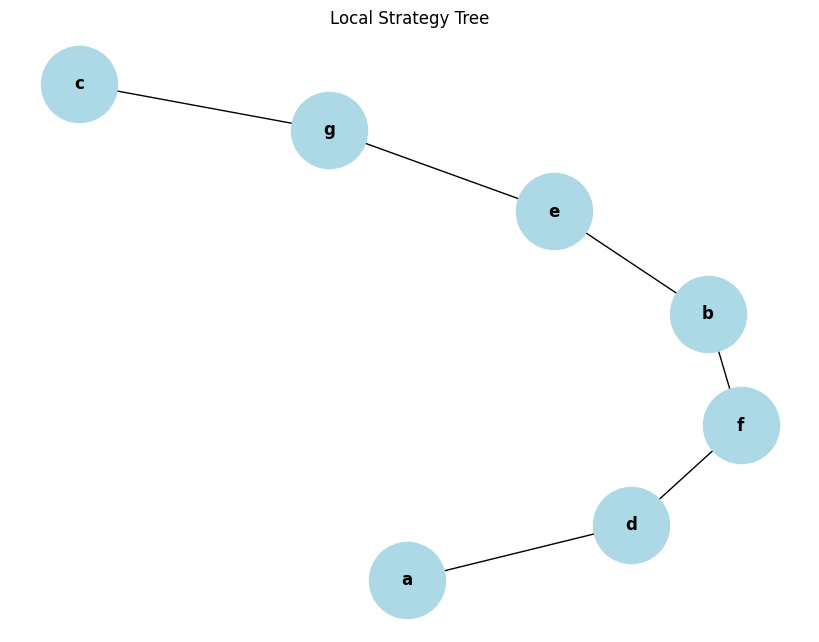

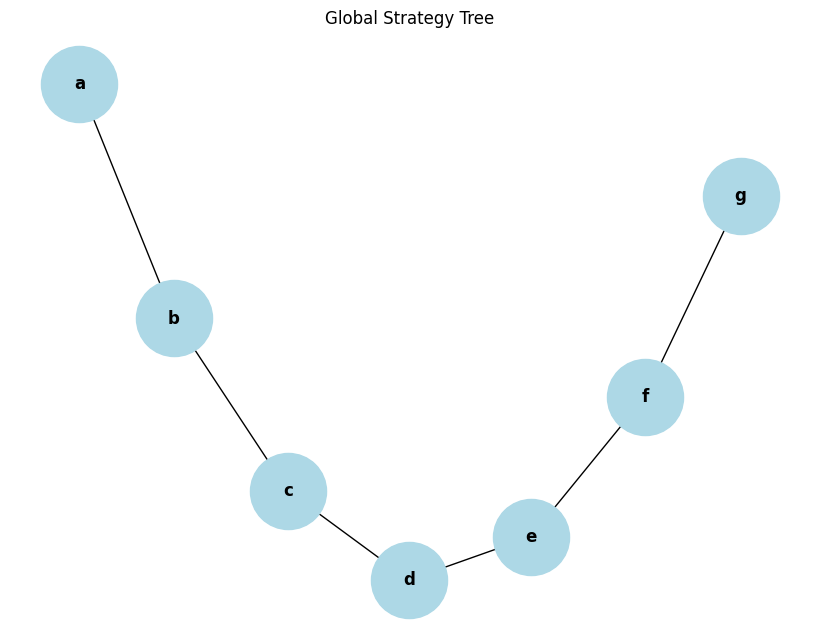

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import permutations

# Sample LCS length matrix
lcs_matrix = np.array([
    [265, 235, 199, 252, 214, 251, 212],
    [235, 250, 211, 223, 227, 223, 220],
    [199, 211, 257, 197, 234, 195, 229],
    [252, 223, 197, 282, 207, 241, 205],
    [214, 227, 234, 207, 252, 205, 243],
    [251, 223, 195, 241, 205, 280, 208],
    [212, 220, 229, 205, 243, 208, 269]
])

# Set string labels
set_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

# Local Strategy Implementation
def local_strategy(lcs_matrix):
    """
    Builds a binary tree using a local strategy based on LCS similarity values.

    Args:
        lcs_matrix (numpy.ndarray): A matrix of LCS values representing similarities between the strings.

    Returns:
        dict: A dictionary representing the tree structure, where each node points to its children.
    """
    n = len(lcs_matrix)
    tree = {i: [] for i in range(n)}
    visited = set()

    def find_best_neighbor(node_idx):
        """
        Finds the best neighbor node (with highest LCS similarity) that has not yet been visited.

        Args:
            node_idx (int): Index of the current node.

        Returns:
            tuple: A tuple containing the index and LCS value of the best neighbor, or None if no unvisited neighbors exist.
        """
        neighbors = [(i, lcs_matrix[node_idx, i]) for i in range(n) if i not in visited]
        return max(neighbors, key=lambda x: x[1]) if neighbors else None

    def build_tree(node_idx):
        """
        Recursively builds the tree starting from the given node index.

        Args:
            node_idx (int): Index of the current node to start building the tree from.
        """
        visited.add(node_idx)
        while len(tree[node_idx]) < 2:  # Ensure binary tree structure
            best_neighbor = find_best_neighbor(node_idx)
            if not best_neighbor:
                break
            neighbor_idx, _ = best_neighbor
            if len(tree[neighbor_idx]) < 2:  # Ensure binary constraint for the neighbor
                tree[node_idx].append(neighbor_idx)
                tree[neighbor_idx].append(node_idx)  # Add reverse link for undirected visualization
                build_tree(neighbor_idx)

    # Choose the root based on highest total LCS similarity to other nodes
    node_sums = [sum(lcs_matrix[i]) for i in range(n)]  # Sum of LCS values for each node
    root = node_sums.index(max(node_sums))  # Select the node with the highest total LCS similarity
    build_tree(root)
    return tree

def calculate_tree_score(tree, lcs_matrix):
    """
    Calculates the total similarity score of a given tree structure.

    Args:
        tree (dict): The tree structure to evaluate.
        lcs_matrix (numpy.ndarray): The matrix of LCS values representing similarities between the strings.

    Returns:
        int: The total similarity score of the tree.
    """
    score = 0
    for parent, children in tree.items():
        for child in children:
            score += lcs_matrix[parent][child]
    return score

def is_valid_binary_tree(tree):
    """
    Checks if a given tree structure is a valid binary tree.

    Args:
        tree (dict): The tree structure to validate.

    Returns:
        bool: True if the tree is a valid binary tree, False otherwise.
    """
    # Check if each node has at most 2 children
    if any(len(children) > 2 for children in tree.values()):
        return False

    # Count total edges (should be n-1 for a tree)
    edge_count = sum(len(children) for children in tree.values()) // 2
    if edge_count != len(tree) - 1:
        return False

    return True

def try_build_tree(root, children_arrangement, n):
    """
    Attempts to build a valid binary tree with the given root and arrangement of children nodes.

    Args:
        root (int): The index of the root node.
        children_arrangement (list): A list of node indices representing the arrangement of children.
        n (int): The total number of nodes in the tree.

    Returns:
        dict or None: The tree structure if valid, None if the tree cannot be built with the given arrangement.
    """
    tree = {i: [] for i in range(n)}

    # First level: root -> children
    child1, child2 = children_arrangement[0], children_arrangement[1]
    tree[root].extend([child1, child2])
    tree[child1].append(root)
    tree[child2].append(root)

    # Second level: children -> grandchildren
    if len(children_arrangement) >= 6:  # Ensure we have enough nodes for grandchildren
        tree[child1].extend([children_arrangement[2], children_arrangement[3]])
        tree[child2].extend([children_arrangement[4], children_arrangement[5]])

        # Add reverse connections for grandchildren
        tree[children_arrangement[2]].append(child1)
        tree[children_arrangement[3]].append(child1)
        tree[children_arrangement[4]].append(child2)
        tree[children_arrangement[5]].append(child2)

        return tree
    return None

def global_strategy_brute_force(lcs_matrix):
    """
    Builds a binary tree using a brute force approach based on LCS values to maximize the total similarity score.

    Args:
        lcs_matrix (numpy.ndarray): The matrix of LCS values representing similarities between the strings.

    Returns:
        dict: A dictionary representing the tree structure with the highest total LCS score.
    """
    n = len(lcs_matrix)
    best_tree = None
    best_score = float('-inf')

    # Try each node as the root
    for root in range(n):
        # Create a list of remaining nodes
        remaining_nodes = list(range(n))
        remaining_nodes.remove(root)

        # Try different arrangements of the remaining nodes as children
        for perm in permutations(remaining_nodes):
            tree = try_build_tree(root, perm, n)

            if tree is not None and is_valid_binary_tree(tree):
                score = calculate_tree_score(tree, lcs_matrix)
                if score > best_score:
                    best_score = score
                    best_tree = tree.copy()

    # If no valid tree was found, create a simple default tree
    if best_tree is None:
        best_tree = {i: [] for i in range(n)}
        # Create a simple chain as fallback
        for i in range(n-1):
            best_tree[i].append(i+1)
            best_tree[i+1].append(i)

    return best_tree

def visualize_tree(tree, labels, title):
    """
    Visualizes a tree structure using NetworkX and Matplotlib.

    Args:
        tree (dict): The tree structure to visualize.
        labels (list): A list of labels corresponding to the nodes.
        title (str): The title to display for the tree visualization.
    """
    G = nx.Graph()

    for parent, children in tree.items():
        for child in children:
            G.add_edge(labels[parent], labels[child])

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True,
            node_size=3000,
            node_color="lightblue",
            font_size=12,
            font_weight="bold")

    plt.title(title)
    plt.show()

# Build and visualize trees using both strategies
local_tree = local_strategy(lcs_matrix)
global_tree = global_strategy_brute_force(lcs_matrix)

print("Local Tree Structure:", local_tree)
print("\nGlobal Tree Structure:", global_tree)

# Visualize both trees
visualize_tree(local_tree, set_labels, "Local Strategy Tree")
visualize_tree(global_tree, set_labels, "Global Strategy Tree")


Testing with 3 genes...
Testing with 4 genes...
Testing with 5 genes...
Testing with 6 genes...
Testing with 7 genes...
Testing with 8 genes...


<ipython-input-4-da92d5f98544>:237: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  theoretical_global = 0.0001 * np.array([np.math.factorial(n-1) for n in n_theoretical])  # O(n!)


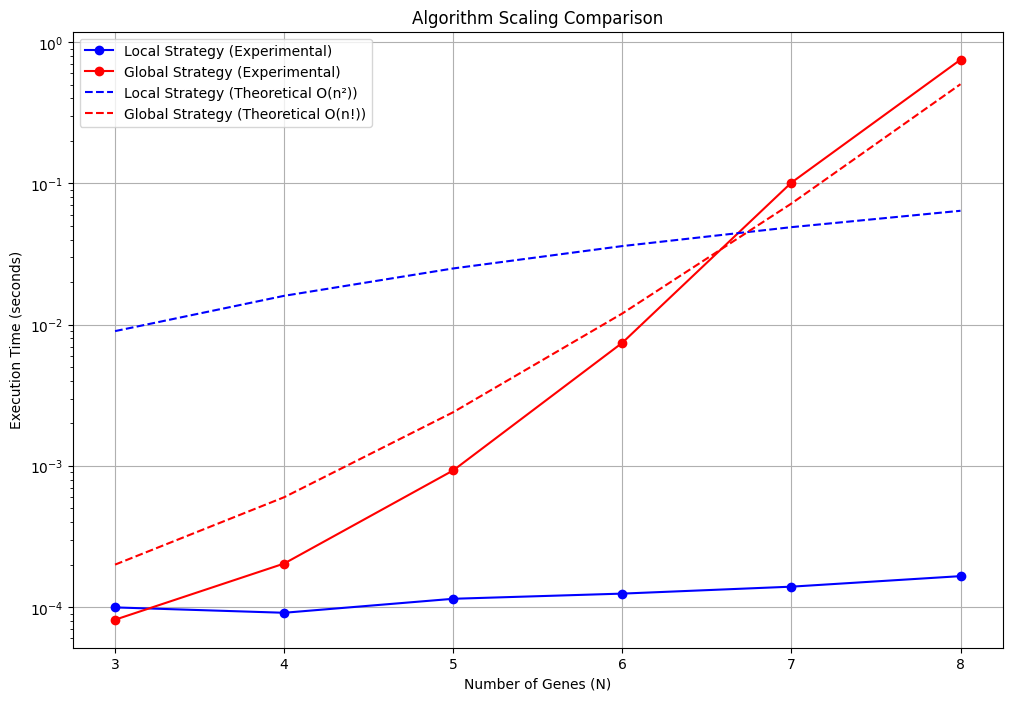


Detailed Results:
N	Matrix Time	Local Time	Global Time
3	0.1425	0.0001	0.0001
4	0.3064	0.0001	0.0002
5	0.5321	0.0001	0.0009
6	0.3655	0.0001	0.0074
7	0.3874	0.0001	0.1013
8	0.7150	0.0002	0.7510


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from itertools import permutations
import random
import string

def generate_random_gene(length):
    """
    Generate a random gene sequence of a given length consisting of characters A, C, G, and T.

    Args:
    - length (int): The length of the gene sequence to generate.

    Returns:
    - str: A randomly generated gene sequence.
    """
    return ''.join(random.choice('ACGT') for _ in range(length))

def calculate_lcs_matrix(sequences):
    """
    Calculate the Longest Common Subsequence (LCS) matrix for a list of sequences.

    Args:
    - sequences (list of str): A list of gene sequences for which the LCS matrix is to be calculated.

    Returns:
    - np.ndarray: An LCS matrix of size (n, n), where n is the number of sequences.
    """
    n = len(sequences)
    matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i][j] = len(sequences[i])
            else:
                matrix[i][j] = lcs(sequences[i], sequences[j])  # Already returns length
    return matrix

def lcs(s1, s2):
    """
    Calculate the length of the Longest Common Subsequence (LCS) between two strings.

    Args:
    - s1 (str): The first string.
    - s2 (str): The second string.

    Returns:
    - int: The length of the longest common subsequence between s1 and s2.
    """
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])

    return dp[m][n]  # Returns the length directly

def local_strategy(lcs_matrix):
    """
    Apply the local strategy to build a binary tree based on the LCS matrix.

    The strategy builds the tree by starting from a root node with the highest total LCS similarity
    and expanding to neighboring nodes using the highest LCS values while maintaining a binary tree structure.

    Args:
    - lcs_matrix (np.ndarray): The LCS matrix used to build the tree.

    Returns:
    - dict: A dictionary representing the tree structure, where each node is mapped to its children.
    """
    n = len(lcs_matrix)
    tree = {i: [] for i in range(n)}
    visited = set()

    def find_best_neighbor(node_idx):
      #finds the best neighbor
        neighbors = [(i, lcs_matrix[node_idx, i]) for i in range(n) if i not in visited]
        return max(neighbors, key=lambda x: x[1]) if neighbors else None

    def build_tree(node_idx):
      #builds the tree
        visited.add(node_idx)
        while len(tree[node_idx]) < 2:  # Ensure binary tree structure
            best_neighbor = find_best_neighbor(node_idx)
            if not best_neighbor:
                break
            neighbor_idx, _ = best_neighbor
            if len(tree[neighbor_idx]) < 2:  # Ensure binary constraint for the neighbor
                tree[node_idx].append(neighbor_idx)
                tree[neighbor_idx].append(node_idx)  # Add reverse link for undirected visualization
                build_tree(neighbor_idx)

    # Choose the root based on highest total LCS similarity to other nodes
    node_sums = [sum(lcs_matrix[i]) for i in range(n)]
    root = node_sums.index(max(node_sums))
    build_tree(root)
    return tree

def global_strategy_brute_force(lcs_matrix):
    """
    Apply the global strategy using brute force to find the optimal tree based on the LCS matrix.

    This strategy explores all possible permutations of nodes, builds trees with them,
    and selects the tree with the highest total LCS score.

    Args:
    - lcs_matrix (np.ndarray): The LCS matrix used to build the tree.

    Returns:
    - dict: A dictionary representing the tree structure, where each node is mapped to its children.
    """
    n = len(lcs_matrix)
    best_tree = None
    best_score = float('-inf')

    def try_build_tree(root, children_arrangement):
        """
        Attempt to build a tree with the given root and child arrangement.

        Args:
        - root (int): The root node of the tree.
        - children_arrangement (list): A list of nodes arranged as children and grandchildren.

        Returns:
        - dict or None: The tree structure if valid, otherwise None.
        """
        tree = {i: [] for i in range(n)}

        if len(children_arrangement) < 2:
            return None

        # First level: root -> children
        child1, child2 = children_arrangement[0], children_arrangement[1]
        tree[root].extend([child1, child2])
        tree[child1].append(root)
        tree[child2].append(root)

        # Second level: children -> grandchildren
        if len(children_arrangement) >= 6:
            tree[child1].extend([children_arrangement[2], children_arrangement[3]])
            tree[child2].extend([children_arrangement[4], children_arrangement[5]])

            tree[children_arrangement[2]].append(child1)
            tree[children_arrangement[3]].append(child1)
            tree[children_arrangement[4]].append(child2)
            tree[children_arrangement[5]].append(child2)

        return tree

    # Try each node as the root
    for root in range(n):
        remaining_nodes = list(range(n))
        remaining_nodes.remove(root)

        for perm in permutations(remaining_nodes):
            tree = try_build_tree(root, perm)
            if tree is not None:
                score = sum(lcs_matrix[i][j] for i in tree for j in tree[i])
                if score > best_score:
                    best_score = score
                    best_tree = tree.copy()

    if best_tree is None:
        best_tree = {i: [] for i in range(n)}
        for i in range(n-1):
            best_tree[i].append(i+1)
            best_tree[i+1].append(i)

    return best_tree

def measure_execution_time(n_genes, gene_length):
    """
    Measure the execution time for both the local and global strategies on randomly generated gene sequences.

    Args:
    - n_genes (int): The number of genes to generate.
    - gene_length (int): The length of each gene sequence.

    Returns:
    - tuple: A tuple containing execution times for matrix calculation, local strategy, and global strategy.
    """
    # Generate random sequences
    sequences = [generate_random_gene(gene_length) for _ in range(n_genes)]

    # Calculate LCS matrix
    matrix_start = time()
    lcs_matrix = calculate_lcs_matrix(sequences)
    matrix_time = time() - matrix_start

    # Measure local strategy time
    local_start = time()
    local_strategy(lcs_matrix)
    local_time = time() - local_start

    # Measure global strategy time
    global_start = time()
    global_strategy_brute_force(lcs_matrix)
    global_time = time() - global_start

    return matrix_time, local_time, global_time

# Run experiments
gene_length = 100  # Fixed gene length
n_genes_range = range(3, 9)  # Number of genes to test
trials = 3  # Number of trials for each N

# Store results
matrix_times = []
local_times = []
global_times = []

for n in n_genes_range:
    print(f"Testing with {n} genes...")
    avg_matrix_time = 0
    avg_local_time = 0
    avg_global_time = 0

    for _ in range(trials):
        matrix_t, local_t, global_t = measure_execution_time(n, gene_length)
        avg_matrix_time += matrix_t
        avg_local_time += local_t
        avg_global_time += global_t

    matrix_times.append(avg_matrix_time / trials)
    local_times.append(avg_local_time / trials)
    global_times.append(avg_global_time / trials)

# theoretical complexity curves to compare with practical curves
n_theoretical = np.array(list(n_genes_range))
theoretical_local = 0.001 * n_theoretical**2  # O(n^2)
theoretical_global = 0.0001 * np.array([np.math.factorial(n-1) for n in n_theoretical])  # O(n!)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(n_genes_range, local_times, 'bo-', label='Local Strategy (Experimental)')
plt.plot(n_genes_range, global_times, 'ro-', label='Global Strategy (Experimental)')
plt.plot(n_genes_range, theoretical_local, 'b--', label='Local Strategy (Theoretical O(n²))')
plt.plot(n_genes_range, theoretical_global, 'r--', label='Global Strategy (Theoretical O(n!))')

plt.xlabel('Number of Genes (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Algorithm Scaling Comparison')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

# Print detailed timing results
print("\nDetailed Results:")
print("N\tMatrix Time\tLocal Time\tGlobal Time")
for i, n in enumerate(n_genes_range):
    print(f"{n}\t{matrix_times[i]:.4f}\t{local_times[i]:.4f}\t{global_times[i]:.4f}")


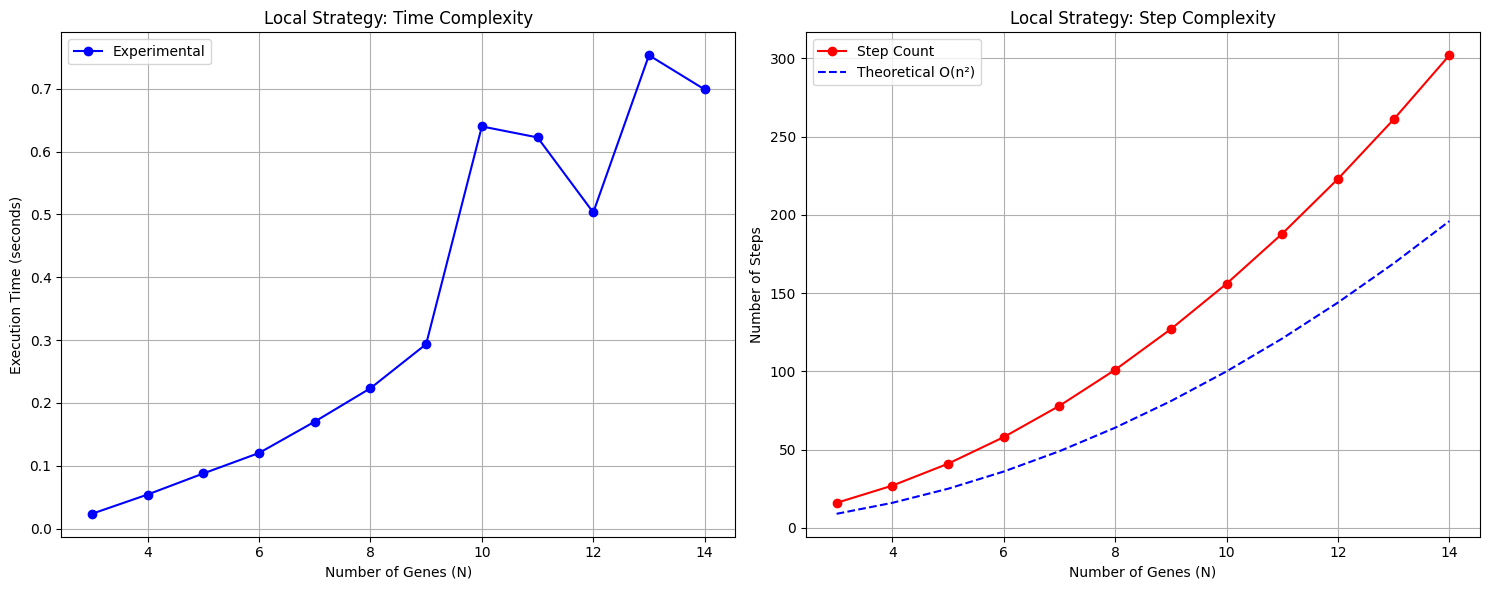


Detailed Results:
N	Execution Time	Step Count
3	0.0236	16
4	0.0543	27
5	0.0878	41
6	0.1204	58
7	0.1703	78
8	0.2234	101
9	0.2935	127
10	0.6399	156
11	0.6224	188
12	0.5030	223
13	0.7532	261
14	0.6987	302


In [5]:
#  Execution Time Analysis

def generate_random_gene(length):
    """
    Generate a random gene sequence of a given length consisting of the characters 'A', 'C', 'G', and 'T'.

    Args:
        length (int): The length of the gene sequence to be generated.

    Returns:
        str: A random gene sequence of the specified length.
    """
    return ''.join(random.choice('ACGT') for _ in range(length))

def lcs(s1, s2):
    """
    Calculate the length of the Longest Common Subsequence (LCS) between two strings.

    Args:
        s1 (str): The first string.
        s2 (str): The second string.

    Returns:
        int: The length of the LCS between the two strings.
    """
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    return dp[m][n]

def calculate_lcs_matrix(sequences):
    """
    Calculate a matrix of Longest Common Subsequence (LCS) lengths for a list of gene sequences.

    Args:
        sequences (list of str): A list of gene sequences to compare.

    Returns:
        np.ndarray: A 2D matrix where each element (i, j) represents the LCS length between sequences[i] and sequences[j].
    """
    n = len(sequences)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i][j] = len(sequences[i])
            else:
                matrix[i][j] = lcs(sequences[i], sequences[j])
    return matrix

def local_strategy(lcs_matrix):
    """
    Apply a local strategy to build a tree based on the Longest Common Subsequence (LCS) matrix.

    Args:
        lcs_matrix (np.ndarray): A matrix containing LCS lengths between gene sequences.

    Returns:
        dict: A tree represented as an adjacency list, where each node has at most two neighbors.
    """
    n = len(lcs_matrix)
    tree = {i: [] for i in range(n)}
    visited = set()

    def find_best_neighbor(node_idx):
        neighbors = [(i, lcs_matrix[node_idx, i]) for i in range(n) if i not in visited]
        return max(neighbors, key=lambda x: x[1]) if neighbors else None

    def build_tree(node_idx):
        visited.add(node_idx)
        while len(tree[node_idx]) < 2:
            best_neighbor = find_best_neighbor(node_idx)
            if not best_neighbor:
                break
            neighbor_idx, _ = best_neighbor
            if len(tree[neighbor_idx]) < 2:
                tree[node_idx].append(neighbor_idx)
                tree[neighbor_idx].append(node_idx)
                build_tree(neighbor_idx)

    node_sums = [sum(lcs_matrix[i]) for i in range(n)]
    root = node_sums.index(max(node_sums))
    build_tree(root)
    return tree

def measure_execution_time(n_genes, gene_length):
    """
    Measure the execution time to generate random gene sequences, calculate the LCS matrix,
    and apply the local strategy.

    Args:
        n_genes (int): The number of genes (sequences) to be generated.
        gene_length (int): The length of each gene sequence.

    Returns:
        float: The total execution time for generating sequences, calculating the LCS matrix, and applying the local strategy.
    """
    sequences = [generate_random_gene(gene_length) for _ in range(n_genes)]
    start_time = time()
    lcs_matrix = calculate_lcs_matrix(sequences)
    local_strategy(lcs_matrix)
    return time() - start_time

#  Step Counter Analysis

class StepCounter:
    """
    A class to keep track of the number of steps (operations) performed during the execution
    of a strategy or algorithm.
    """

    def __init__(self):
        """
        Initialize the step counter with zero steps.
        """
        self.steps = 0

    def increment(self):
        """
        Increment the step counter by one.
        """
        self.steps += 1

def local_strategy_with_counter(lcs_matrix, counter):
    """
    Apply a local strategy to build a tree based on the LCS matrix while counting the number of steps
    (operations) performed using a StepCounter instance.

    Args:
        lcs_matrix (np.ndarray): A matrix containing LCS lengths between gene sequences.
        counter (StepCounter): An instance of the StepCounter class to count operations.

    Returns:
        dict: A tree represented as an adjacency list, where each node has at most two neighbors.
    """
    n = len(lcs_matrix)
    tree = {i: [] for i in range(n)}
    visited = set()

    def find_best_neighbor(node_idx):
        for i in range(n):
            if i not in visited:
                counter.increment()  # Count comparison operation
        neighbors = [(i, lcs_matrix[node_idx, i]) for i in range(n) if i not in visited]
        return max(neighbors, key=lambda x: x[1]) if neighbors else None

    def build_tree(node_idx):
        visited.add(node_idx)
        while len(tree[node_idx]) < 2:
            counter.increment()  # Count iteration
            best_neighbor = find_best_neighbor(node_idx)
            if not best_neighbor:
                break
            neighbor_idx, _ = best_neighbor
            if len(tree[neighbor_idx]) < 2:
                tree[node_idx].append(neighbor_idx)
                tree[neighbor_idx].append(node_idx)
                build_tree(neighbor_idx)

    for i in range(n):
        for j in range(n):
            counter.increment()  # Count sum operation

    node_sums = [sum(lcs_matrix[i]) for i in range(n)]
    root = node_sums.index(max(node_sums))
    build_tree(root)
    return tree

# Run experiments
gene_length = 100
n_genes_range = range(3, 15)
trials = 3

# Time-based analysis
execution_times = []
for n in n_genes_range:
    avg_time = sum(measure_execution_time(n, gene_length) for _ in range(trials)) / trials
    execution_times.append(avg_time)

# Step-based analysis
step_counts = []
for n in n_genes_range:
    counter = StepCounter()
    matrix = np.random.rand(n, n)  # Random matrix for testing
    local_strategy_with_counter(matrix, counter)
    step_counts.append(counter.steps)

# Create plots
plt.figure(figsize=(15, 6))

# Plot 1: Execution Time
plt.subplot(1, 2, 1)
plt.plot(n_genes_range, execution_times, 'bo-', label='Experimental')
plt.xlabel('Number of Genes (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Local Strategy: Time Complexity')
plt.grid(True)
plt.legend()

# Plot 2: Step Count
plt.subplot(1, 2, 2)
plt.plot(n_genes_range, step_counts, 'ro-', label='Step Count')
theoretical_steps = [n**2 for n in n_genes_range]  # O(n^2) theoretical line
plt.plot(n_genes_range, theoretical_steps, 'b--', label='Theoretical O(n²)')
plt.xlabel('Number of Genes (N)')
plt.ylabel('Number of Steps')
plt.title('Local Strategy: Step Complexity')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
print("N\tExecution Time\tStep Count")
for i, n in enumerate(n_genes_range):
    print(f"{n}\t{execution_times[i]:.4f}\t{step_counts[i]}")


Testing with 3 genes...
Testing with 4 genes...
Testing with 5 genes...
Testing with 6 genes...
Testing with 7 genes...


<ipython-input-6-fda961ad4d76>:112: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  theoretical_times = [np.math.factorial(n) * 0.0001 for n in n_genes_range]
<ipython-input-6-fda961ad4d76>:124: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  theoretical_steps = [np.math.factorial(n) for n in n_genes_range]


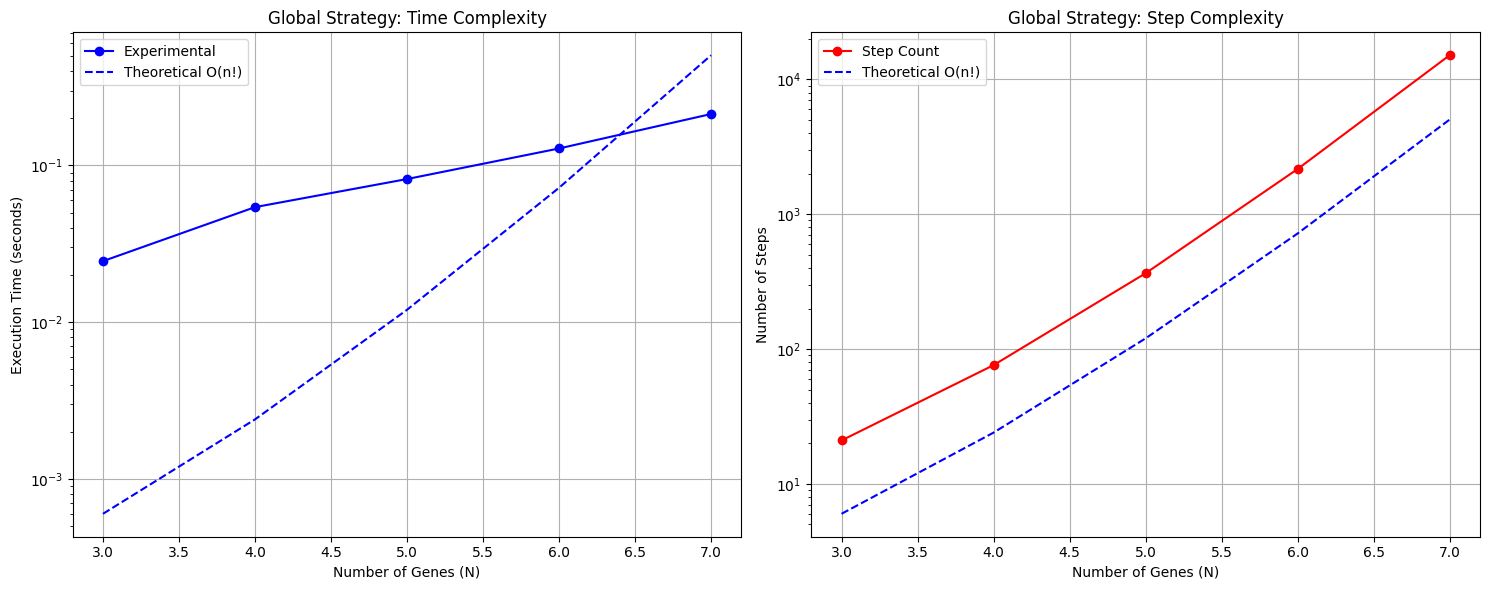


Detailed Results:
N	Execution Time	Step Count
3	0.0245	21
4	0.0542	76
5	0.0818	365
6	0.1282	2166
7	0.2127	15127


In [6]:
# Part 1: Execution Time Analysis
def generate_random_gene(length):
    return ''.join(random.choice('ACGT') for _ in range(length))

def lcs(s1, s2):
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    return dp[m][n]

def calculate_lcs_matrix(sequences):
    n = len(sequences)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i][j] = len(sequences[i])
            else:
                matrix[i][j] = lcs(sequences[i], sequences[j])
    return matrix

class StepCounter:
    def __init__(self):
        self.steps = 0

    def increment(self):
        self.steps += 1

def global_strategy_with_counter(lcs_matrix, counter=None):
    n = len(lcs_matrix)
    best_tree = None
    best_score = float('-inf')

    def try_build_tree(root, children_arrangement):
        if counter: counter.increment()  # Count tree building attempt
        tree = {i: [] for i in range(n)}

        if len(children_arrangement) < 2:
            return None

        child1, child2 = children_arrangement[0], children_arrangement[1]
        tree[root].extend([child1, child2])
        tree[child1].append(root)
        tree[child2].append(root)

        if len(children_arrangement) >= 6:
            tree[child1].extend([children_arrangement[2], children_arrangement[3]])
            tree[child2].extend([children_arrangement[4], children_arrangement[5]])

            tree[children_arrangement[2]].append(child1)
            tree[children_arrangement[3]].append(child1)
            tree[children_arrangement[4]].append(child2)
            tree[children_arrangement[5]].append(child2)

        return tree

    for root in range(n):
        if counter: counter.increment()  # Count root selection
        remaining_nodes = list(range(n))
        remaining_nodes.remove(root)

        for perm in permutations(remaining_nodes):
            if counter: counter.increment()  # Count permutation attempt
            tree = try_build_tree(root, perm)
            if tree is not None:
                if counter: counter.increment()  # Count score calculation
                score = sum(lcs_matrix[i][j] for i in tree for j in tree[i])
                if score > best_score:
                    best_score = score
                    best_tree = tree.copy()

    return best_tree

def measure_execution_time(n_genes, gene_length):
    sequences = [generate_random_gene(gene_length) for _ in range(n_genes)]
    start_time = time()
    lcs_matrix = calculate_lcs_matrix(sequences)
    global_strategy_with_counter(lcs_matrix)
    return time() - start_time

# Run experiments
gene_length = 100
n_genes_range = range(3, 8)  # Limited range due to factorial growth
trials = 3

# Time-based analysis
execution_times = []
for n in n_genes_range:
    print(f"Testing with {n} genes...")
    avg_time = sum(measure_execution_time(n, gene_length) for _ in range(trials)) / trials
    execution_times.append(avg_time)

# Step-based analysis
step_counts = []
for n in n_genes_range:
    counter = StepCounter()
    matrix = np.random.rand(n, n)
    global_strategy_with_counter(matrix, counter)
    step_counts.append(counter.steps)

# Create plots
plt.figure(figsize=(15, 6))

# Plot 1: Execution Time
plt.subplot(1, 2, 1)
plt.plot(n_genes_range, execution_times, 'bo-', label='Experimental')
theoretical_times = [np.math.factorial(n) * 0.0001 for n in n_genes_range]
plt.plot(n_genes_range, theoretical_times, 'b--', label='Theoretical O(n!)')
plt.xlabel('Number of Genes (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Global Strategy: Time Complexity')
plt.grid(True)
plt.yscale('log')
plt.legend()

# Plot 2: Step Count
plt.subplot(1, 2, 2)
plt.plot(n_genes_range, step_counts, 'ro-', label='Step Count')
theoretical_steps = [np.math.factorial(n) for n in n_genes_range]
plt.plot(n_genes_range, theoretical_steps, 'b--', label='Theoretical O(n!)')
plt.xlabel('Number of Genes (N)')
plt.ylabel('Number of Steps')
plt.title('Global Strategy: Step Complexity')
plt.grid(True)
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
print("N\tExecution Time\tStep Count")
for i, n in enumerate(n_genes_range):
    print(f"{n}\t{execution_times[i]:.4f}\t{step_counts[i]}")

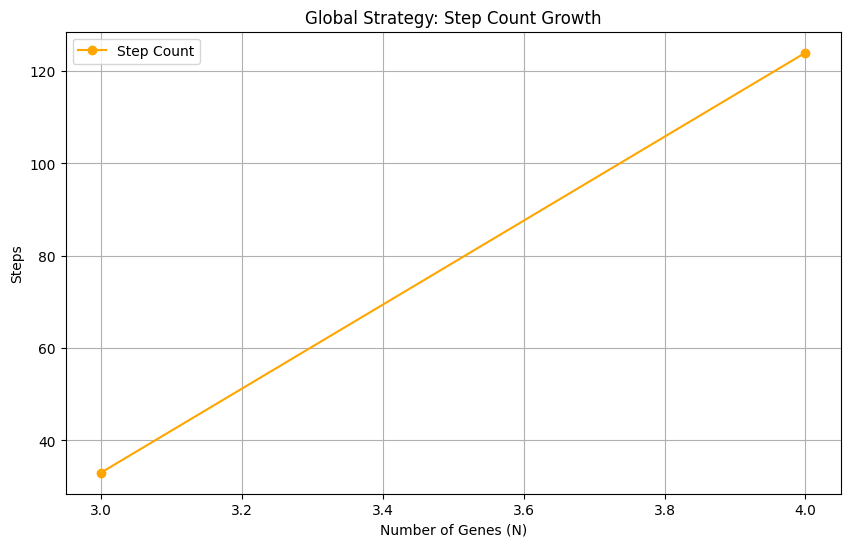

In [9]:
import time
# Function to count steps in the global strategy
def global_strategy_brute_force_step_counter(lcs_matrix):
    n = len(lcs_matrix)
    step_count = 0  # Initialize step counter

    best_tree = None
    best_score = float('-inf')

    # Try each node as the root
    for root in range(n):
        step_count += 1  # Increment for each root evaluation
        remaining_nodes = list(range(n))
        remaining_nodes.remove(root)

        # Try different arrangements of the remaining nodes as children
        for perm in permutations(remaining_nodes):
            step_count += 1  # Increment for each permutation

            tree = {i: [] for i in range(n)}
            child1, child2 = perm[0], perm[1]

            # Build a simple tree structure for evaluation
            tree[root].extend([child1, child2])
            tree[child1].append(root)
            tree[child2].append(root)

            score = 0
            for i in range(n):
                for j in tree[i]:
                    score += lcs_matrix[i][j]
                    step_count += 1  # Increment for each score calculation

            if score > best_score:
                best_score = score
                best_tree = tree.copy()

    return best_tree, step_count

# Generate LCS matrices for increasing numbers of genes
num_genes_range = range(3, 5)  # Small range for factorial growth demonstration
execution_times = []
step_counts = []

for num_genes in num_genes_range:
    # Create a random LCS matrix
    lcs_matrix = np.random.randint(100, 300, size=(num_genes, num_genes))
    np.fill_diagonal(lcs_matrix, 0)

    # Measure execution time
    start_time = time.time()
    _, steps = global_strategy_brute_force_step_counter(lcs_matrix)
    end_time = time.time()

    execution_times.append(end_time - start_time)
    step_counts.append(steps)


# Plot step count vs. number of genes but only for 5 genes
plt.figure(figsize=(10, 6))
plt.plot(num_genes_range, step_counts, marker="o", color="orange", label="Step Count")
plt.xlabel("Number of Genes (N)")
plt.ylabel("Steps")
plt.title("Global Strategy: Step Count Growth")
plt.legend()
plt.grid()
plt.show()


In [10]:
def align_sequences(seq1, seq2):
    """
    Align two sequences using a dynamic programming approach to maximize the number of matching characters.

    The function uses a scoring system where:
    - A match between characters earns 1 point
    - A mismatch or gap earns 0 points.

    The output consists of two aligned sequences, with '-' representing gaps.

    Parameters:
    seq1 (str): The first sequence to be aligned.
    seq2 (str): The second sequence to be aligned.

    Returns:
    tuple: A tuple containing two strings representing the aligned sequences.
    """
    m, n = len(seq1), len(seq2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Fill the DP table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if seq1[i - 1] == seq2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    # Traceback to create aligned sequences
    aligned_seq1, aligned_seq2 = [], []
    i, j = m, n
    while i > 0 and j > 0:
        if seq1[i - 1] == seq2[j - 1]:
            aligned_seq1.append(seq1[i - 1])
            aligned_seq2.append(seq2[j - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] >= dp[i][j - 1]:
            aligned_seq1.append(seq1[i - 1])
            aligned_seq2.append("-")
            i -= 1
        else:
            aligned_seq1.append("-")
            aligned_seq2.append(seq2[j - 1])
            j -= 1

    while i > 0:
        aligned_seq1.append(seq1[i - 1])
        aligned_seq2.append("-")
        i -= 1

    while j > 0:
        aligned_seq1.append("-")
        aligned_seq2.append(seq2[j - 1])
        j -= 1

    return "".join(reversed(aligned_seq1)), "".join(reversed(aligned_seq2))


def classify_differences(seq1, seq2):
    """
    Classify differences between two aligned sequences into insertions, deletions, and mutations.

    The function identifies three types of differences:
    - Insertions: A character exists in seq2 but not in seq1.
    - Deletions: A character exists in seq1 but not in seq2.
    - Mutations: Characters in seq1 and seq2 are different but both are non-gap characters.

    Parameters:
    seq1 (str): The first aligned sequence.
    seq2 (str): The second aligned sequence.

    Returns:
    tuple: A tuple containing the count of insertions, deletions, and mutations.
    """
    insertions, deletions, mutations = 0, 0, 0
    total_positions = len(seq1)

    for i in range(total_positions):
        if seq1[i] == "-" and seq2[i] != "-":
            insertions += 1
        elif seq2[i] == "-" and seq1[i] != "-":
            deletions += 1
        elif seq1[i] != seq2[i]:
            mutations += 1

    return insertions, deletions, mutations


def estimate_probabilities(sequences):
    """
    Estimate the probabilities of insertions, deletions, and mutations across a set of sequences.

    The function performs pairwise sequence alignment for all sequences in the input list and calculates
    the probabilities of insertions, deletions, and mutations based on the alignment results.

    Parameters:
    sequences (list of str): A list of sequences to be compared.

    Returns:
    tuple: A tuple containing the probabilities of insertions, deletions, and mutations.
    """
    total_insertions, total_deletions, total_mutations = 0, 0, 0
    total_length = 0

    # Perform pairwise alignment and classification
    for i, seq1 in enumerate(sequences):
        for j, seq2 in enumerate(sequences):
            if i < j:  # Avoid duplicate comparisons
                aligned_seq1, aligned_seq2 = align_sequences(seq1, seq2)
                ins, dels, muts = classify_differences(aligned_seq1, aligned_seq2)
                total_insertions += ins
                total_deletions += dels
                total_mutations += muts
                total_length += len(aligned_seq1)

    # Normalize to get probabilities
    prob_insertions = total_insertions / total_length
    prob_deletions = total_deletions / total_length
    prob_mutations = total_mutations / total_length

    return prob_insertions, prob_deletions, prob_mutations


# dataset
sequences = [
    "ATGGTGCGAAAGCATCTCTTTTCGTGGCGTGATAAGTTTTATGGTATCCCCGGACGTTGGCTACTACAATTCTCCGAAGTATAAGTGAGTAGGATATGTCAATAACAAGA",
    "TGGTGCGAAAGCATCTCTTTTCCGTGGCGTATAGTTTTATGGTATCCCCGGAACGCTGGCTACTACAATCTCCGAAGTATAGAGTGAGTAGATTTAATTAACAGAGGGCG",
    "TCTGTGCGATATACATCTCTATCGTTGCGGTATGTTTTATGTGCATCACCCCACGCGCTGGCTACAGTACAATCTGCTGGAAGTACTAGGTGGTAGTTAATAACTAGGGT",
    "ATGAGGCGCAAAATTCTCTTTCTCGTGGCGCTGATTAAGTTTTATGTATCCCCGGACGTTGGCTACTGACAATTGCTCCGAAGTATAAAGTAGTAGGATATGTCAATAAC",
    "TGGTGCGATATACATCTCTTTTCGTGCGTATGTTTTATGGTGATCACCCGGAACCGCTGGCTACATACAATCTCTGGAAGTACTAGGTGGTAGTTTAATAACTAGAGGTG",
]

# Estimate probabilities
prob_insertions, prob_deletions, prob_mutations = estimate_probabilities(sequences)

print("Estimated Probabilities:")
print(f"Insertions: {prob_insertions:.4f}")
print(f"Deletions: {prob_deletions:.4f}")
print(f"Mutations: {prob_mutations:.4f}")


Estimated Probabilities:
Insertions: 0.1359
Deletions: 0.1359
Mutations: 0.0000
